In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from astropy.table import Table
t = Table.read('adjusted.fits', format='fits')

In [4]:
print(t)

     Source_Name               RA         ... PanSTARRS_missing
---------------------- ------------------ ... -----------------
ILTJ104345.35+523239.2 160.93896565257427 ...             False
ILTJ104347.01+523145.1 160.94586125313552 ...             False
ILTJ104349.41+522333.4 160.95588630837182 ...             False
ILTJ104408.30+520810.1 161.03459499020352 ...             False
ILTJ104418.39+523205.4 161.07663290149634 ...             False
ILTJ104418.95+524612.3  161.0789652377806 ...             False
ILTJ104422.89+520947.0 161.09538625701006 ...             False
ILTJ104435.02+520436.8 161.14589797337828 ...             False
ILTJ104436.16+521321.3   161.150663907738 ...             False
ILTJ104441.57+522653.1  161.1731935721447 ...             False
                   ...                ... ...               ...
ILTJ152208.13+522414.1 230.53386793590374 ...             False
ILTJ152232.31+532127.9 230.63461286029684 ...             False
ILTJ152236.00+530247.8 230.6500175555704

In [5]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band

In [6]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [7]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm


In [8]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-23/(1+z))
    return P
Pw22 = (power(Lum_d,Flux_22,z))
Pw = (power(Lum_d,flux_tot,z)*(1+z)**(-0.7))

In [9]:
adj = np.where(Pw22>=4e43)
adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz

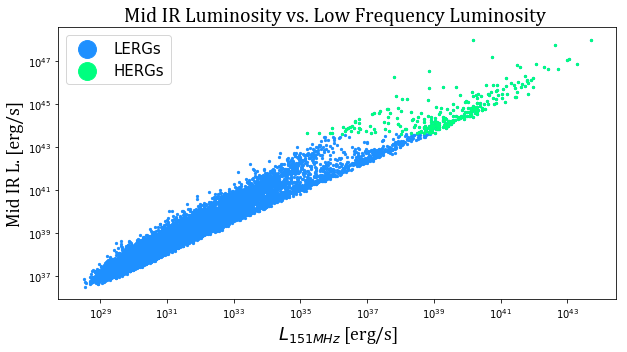

In [33]:
bsfont = {'fontname':'Cambria Math'}

#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.figure(figsize=(10,5))
plt.scatter(Pw/1e4, Pw22,s =5, c='dodgerblue',label='LERGs')
plt.scatter(Pw_adj1/1e4 ,Pw_adj ,s =5,c='springgreen',label='HERGs')
plt.yscale('log')
plt.xscale('log')
#plt.ylim(0,1e48)
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20,**bsfont)
plt.legend(loc=2, prop={'size': 15},markerscale=8)
plt.xlabel('$L_{151MHz}$ [erg/s]', fontsize = 18,**bsfont)
plt.ylabel('Mid IR L. [erg/s]', fontsize = 18,**bsfont)
plt.savefig('HERGs LERGs.png')
plt.show()